# XOR 
* 하나의 히든 레이어를 도입한다.
* input layer는 2개의 노드 + 1개의 바이어스
* hidden layer는 3개의 노드 + 1개의 바이어스
* output은 하나의 노드로 한다.

위의 데이터를 neural networks에서 backpropagation을 이용하여으로 학습시켜라. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = [np.array([0,0]).reshape(2,1),np.array([1,0]).reshape(2,1),np.array([0,1]).reshape(2,1),np.array([1,1]).reshape(2,1)] 
y = [np.array(0).reshape(1,1),np.array(1.).reshape(1,1),np.array(1.).reshape(1,1),np.array(0).reshape(1,1)]

In [3]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

In [4]:
class neural_net():
    def __init__(self, sizes:list):
        self.sizes=sizes
        self.weights=[np.random.randn(x,y) for x,y in zip(sizes[1:], sizes[:-1])]
        self.biases=[np.random.randn(x,1) for x in sizes[1:]]
        self.n_layers=len(sizes)
        """weights와 biases 모두 len(sizes)-1 개의 numpy ndarray를 성분으로 갖는 list
        초기에는 random한 값을 가짐"""
    
    def feedforward(self, a):
        """a is a numpy ndarray of shape (n,1)"""
        for b, w in zip(self.biases, self.weights):
            a=sigmoid(np.dot(w,a)+b) 
        return a
    
    def backprop(self, x, y):
        """x and y are ndarray of shape (n,1)"""

        pd_b=[np.zeros(b.shape) for b in self.biases]
        pd_w=[np.zeros(w.shape) for w in self.weights]
        error=[np.zeros((i,1)) for i in self.sizes[1:]]
        
        activation=x #initial activatio(=input)
        zs=[] #list of weighted sums(numpy ndarray of shape (n,1)) for each layer
        activations=[] #list of activations(numpy ndarray of shape (n,1)) for each layer
        
        for b, w in zip(self.biases, self.weights):
            z=np.dot(w,activation)+b
            zs.append(z)
            activation=sigmoid(z)
            activations.append(activation) 
            """zs 와 activations 모두 n_layers-1 개의 성분을 가짐"""
        
        error[self.n_layers-2]=(activations[-1]-y)*sigmoid_prime(zs[-1])
        for i in reversed(range(self.n_layers-2)):
            error[i]=np.dot(self.weights[i+1].T,error[i+1])*sigmoid_prime(zs[i])
        for i in range(self.n_layers-1):
            pd_b[i]=error[i]
            pd_w[i]=error[i]*activations[i]
        
        return pd_w, pd_b
    
    def learn(self,data,target,epochs,eta):
        cost_history=[]
        ini=0
        for x,y in zip(data,target):
            ini+=0.5*np.linalg.norm(y-self.feedforward(x))**2
        cost_history.append(ini)
        for e in range(epochs):
            loss=0
            for x,y in zip(data,target):
                delta_w,delta_b=self.backprop(x,y)
                for j in range(self.n_layers-1):
                    self.weights[j]-=eta*delta_w[j]
                    self.biases[j]-=eta*delta_b[j]
                loss+=0.5*np.linalg.norm(y-self.feedforward(x))**2
            cost_history.append(loss)
            
        plt.plot([i for i in range(epochs+1)],cost_history,'o-')
        plt.ylabel("cost")
        plt.xlabel("epoch")
        plt.show()
            
        
            
            

[array([[0.11635667]]), array([[0.41749836]]), array([[0.22734776]]), array([[0.67626135]])]


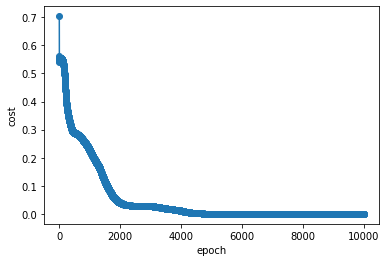

In [9]:
result=neural_net([2,30,30,1])
s=[result.feedforward(x) for x in X]
print(s)
result.learn(X,y,10000,0.3)

In [10]:
s=[result.feedforward(x) for x in X]
print(s)

[array([[0.00549595]]), array([[0.99647555]]), array([[0.99308856]]), array([[0.00775072]])]
